<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/Data_Mining_Social_Media_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Taking Comments as Text from Youtube API***

In [ ]:
import pandas as pd
df=pd.read_csv('comments1.csv')

FileNotFoundError: ignored

In [ ]:
document=df['text'].to_list()

In [ ]:
import numpy as np
document.count(np.nan)

1751

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

***Removing Null elements***

In [ ]:
while document.count(np.nan):
  document.remove(np.nan)

***Feature Extraction and Cleaning of Comments***

In [ ]:
from textblob import TextBlob
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Use TextBlob
def textblob_tokenizer(str_input):
    str_input = re.sub(r'\d+','', str_input)
    str_input=str_input.strip()

    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens if token.isalpha()]
    lemmatizer=WordNetLemmatizer()
    words=[lemmatizer.lemmatize(word) for word in words]
      
    return words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=textblob_tokenizer)
X = vectorizer.fit_transform(df['text'].apply(lambda x: np.str_(x)))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'el', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'le', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'u', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  

***TFIDF & K-Means to vectorize and Label***

In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

***Chi-Square Preprocessing to pick most significant words***

In [ ]:
L=[]
for i in range(true_k):
  print("Cluster %d:" % i)
  for ind in order_centroids[i, :350]:
    if len(terms[ind])<=2:
      continue
    A=0
    C=0
    N=len(document)
    for cnt in document:
      if terms[ind] in cnt:
        A=A+1
      else:
        C=C+1
    B=0
    D=0
    for j in range(true_k):
      if j!=i:
        for ijd in order_centroids[j,:350]:
          for dnt in document:
            if terms[ijd] in dnt:
              if terms[ind] in dnt:
                B=B+1
              else:
                D=D+1
    try:
      chisqure=(N*(A*D-C*B)*(A*D-C*B))/((A+B)*(C+D)*(A+C)*(B+D))
      L.append([terms[ind],i+1,chisqure])
      print(terms[ind])
      print(chisqure)
    except:
      pass

Cluster 0:
egg
5.164568544202303
look
1.234029983324625
tomato
5.9381868014336945
knife
0.001089075794131208
cook
4.075750632077694
like
3.3603762633952363
good
1.6079965761937531
shakshuka
1.4323936910774606
dish
3.6472426391849364
nice
0.20636375194719875
delici
0.8712748173412324
use
6.065834072801295
onion
4.7987937744800755
food
0.973305258696194
great
1.3087138234817006
make
3.939266285292587
bread
1.642452232560183
eat
5.025245126457734
add
4.958382671281837
garlic
3.525869309733081
yummi
0.004520984227911177
recip
3.1192068611097983
just
3.1875798864982827
need
1.0185490078485455
breakfast
1.1551382461688025
veri
0.0441267935957126
video
2.069821267513713
best
0.7028639840206863
way
2.8692446140453596
sauc
1.8665548396913936
oliv
1.9218706746712093
chop
1.390604748581443
wow
0.0735020329307285
cut
0.3749575287439087
love
2.0554179470165512
tunisian
0.02713018111831786
pepper
3.0469087491312603
tast
2.4868163398116048
harissa
1.0023021548313784
huevo
0.0734171908394935
did
2.095

In [ ]:
af=pd.DataFrame(L,columns=['Comments','Class','Chi_Square'])

In [ ]:
af.sort_values(["Chi_Square"], axis=0, 
                 ascending=False, inplace=True) 

In [ ]:
af.to_csv('Data_processed_comments.csv')

In [ ]:
af=pd.read_csv('Data_processed_comments (3).csv')

In [ ]:
len(af)

905

In [ ]:
pf=pd.DataFrame()
for a in af['Comments']:
  kf=af.loc[af['Comments']==a]
  if len(kf)>1:
    """
    print('Gi')
    print(kf)
    print(max(kf.Chi_Square))
    print(kf.loc[kf['Chi_Square']==max(kf['Chi_Square'])].values.tolist()[0])"""
    pf=pf.append(kf.loc[kf['Chi_Square']==max(kf['Chi_Square'])])
  else:
    pf=pf.append(kf)


In [ ]:
len(pf)

904

In [ ]:
pf.drop_duplicates(inplace=True) 

In [ ]:
pf.sort_values(["Chi_Square"], axis=0, 
                 ascending=False, inplace=True) 

In [ ]:
len(pf)

644

In [ ]:
pf.Class.value_counts()

1    286
2    232
3    126
Name: Class, dtype: int64

In [ ]:
pf.loc[pf.Class==2].head(100)

,Unnamed: 0,Comments,Class,Chi_Square
29,569,ere,2,3.283302
109,454,hari,2,1.269662
114,557,est,2,1.188157
154,321,波斯版番茄炒蛋,2,0.962367
250,562,esp,2,0.558844
...,...,...,...,...
704,485,goood,2,0.021733
705,433,habanero,2,0.021658
706,429,hadisha,2,0.021658
707,468,hambr,2,0.020846


In [ ]:
pf.loc[pf.Comments.isin(['pan','soup','knife','cook','common','prefer','known','cuisine'])]
#cLASS -3 -- hOW tO AND cOOKING UTENSILS

,Unnamed: 0,Comments,Class,Chi_Square
19,597,cook,3,4.090274
130,727,pan,3,1.062552
335,832,prefer,3,0.350552
397,898,common,3,0.241361
415,843,known,3,0.226441
433,785,soup,3,0.206412
739,675,knife,3,0.012790


In [ ]:
#CLASS 2-Others
# So DBScan applied to Class 2 and 3

In [ ]:
pf.loc[pf.Comments.isin(['tomato','onion','egg','salt','meat','garlic','pepper'])]
#CLASS 1--fOOD ITEMS

,Unnamed: 0,Comments,Class,Chi_Square
3,2,tomato,1,5.938187
6,0,egg,1,5.164569
11,12,onion,1,4.798794
26,19,garlic,1,3.525869
36,36,pepper,1,3.046909
149,63,salt,1,0.974561
352,221,meat,1,0.328667
739,675,knife,3,0.012790


***MODEL BUILDING***

In [ ]:
from sklearn import preprocessing

TextToNum = preprocessing.LabelEncoder()
Xt= TextToNum.fit_transform(pf.Comments)


In [ ]:
X=Xt
y=pf['Class']
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
from sklearn.naive_bayes import GaussianNB
gnb_with_smote = GaussianNB()
gnb_without_smote = GaussianNB()


from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    gnb_without_smote.fit(X_train.reshape(-1, 1), y_train)

    X_train, y_train = sm.fit_sample(X_train.reshape(-1,1), y_train.ravel())
    regressor.fit(X_train.reshape(-1, 1), y_train)
    gnb_with_smote.fit(X_train.reshape(-1, 1), y_train)

    


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.war

Train Index:  [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
pip install sklearn

***PERFORMANCE METRICS***

In [ ]:
Overall=[]
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred=np.ceil(y_pred).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
reslt=classification_report(y_test,y_pred,target_names=['Food-Items','Others','How_To_Cooking_Utensils'],output_dict=True)
print(reslt)
Overall.append(["Random_Forest",reslt['accuracy'],reslt['weighted avg']['f1-score']])
sklearn.metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

[[ 2  2  0]
 [ 0 49  3]
 [ 0  4  4]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       0.89      0.94      0.92        52
           3       0.57      0.50      0.53         8

    accuracy                           0.86        64
   macro avg       0.82      0.65      0.71        64
weighted avg       0.86      0.86      0.85        64

0.859375
{'Food-Items': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 4}, 'Others': {'precision': 0.8909090909090909, 'recall': 0.9423076923076923, 'f1-score': 0.9158878504672897, 'support': 52}, 'How_To_Cooking_Utensils': {'precision': 0.5714285714285714, 'recall': 0.5, 'f1-score': 0.5333333333333333, 'support': 8}, 'accuracy': 0.859375, 'macro avg': {'precision': 0.8207792207792207, 'recall': 0.6474358974358975, 'f1-score': 0.7052959501557633, 'support': 64}, 'weighted avg': {'precision': 0.8577922077922078, 'recall': 0.859375, 'f1-score': 0.8

0.8524922118380062

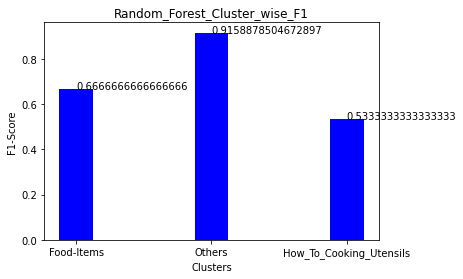

In [ ]:
Lst=[]
Clusters=['Food-Items','Others','How_To_Cooking_Utensils']
for c in Clusters:
  Lst.append([c,reslt[c]['f1-score']])
RFplot=pd.DataFrame(Lst)
RFplot.columns=['Cluster','F1']
plt.bar(RFplot['Cluster'],RFplot['F1'], color = 'b', width = 0.25)
plt.title('Random_Forest_Cluster_wise_F1')
plt.ylabel('F1-Score')
plt.xlabel('Clusters')
for i in range(len(RFplot['F1'].to_list())):
  plt.annotate(str(RFplot['F1'][i]), xy=(RFplot['Cluster'][i],RFplot['F1'][i]))
plt.show()

In [ ]:
y_pred = gnb_with_smote.predict(X_test.reshape(-1,1))
y_pred=np.ceil(y_pred).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
reslt=classification_report(y_test,y_pred,target_names=['Food-Items','Others','How_To_Cooking_Utensils'],output_dict=True)
print(reslt)
Overall.append(["NB_Smote",reslt['accuracy'],reslt['weighted avg']['f1-score']])
sklearn.metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))


[[ 3  1  0]
 [ 5 47  0]
 [ 5  0  3]]
              precision    recall  f1-score   support

           1       0.23      0.75      0.35         4
           2       0.98      0.90      0.94        52
           3       1.00      0.38      0.55         8

    accuracy                           0.83        64
   macro avg       0.74      0.68      0.61        64
weighted avg       0.93      0.83      0.85        64

0.828125
{'Food-Items': {'precision': 0.23076923076923078, 'recall': 0.75, 'f1-score': 0.3529411764705882, 'support': 4}, 'Others': {'precision': 0.9791666666666666, 'recall': 0.9038461538461539, 'f1-score': 0.9400000000000001, 'support': 52}, 'How_To_Cooking_Utensils': {'precision': 1.0, 'recall': 0.375, 'f1-score': 0.5454545454545454, 'support': 8}, 'accuracy': 0.828125, 'macro avg': {'precision': 0.7366452991452991, 'recall': 0.6762820512820512, 'f1-score': 0.6127985739750446, 'support': 64}, 'weighted avg': {'precision': 0.9349959935897435, 'recall': 0.828125, 'f1-score':

0.85399064171123

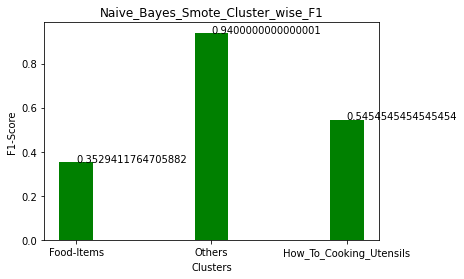

In [ ]:
Lst=[]
Clusters=['Food-Items','Others','How_To_Cooking_Utensils']
for c in Clusters:
  Lst.append([c,reslt[c]['f1-score']])
NB_SM_plot=pd.DataFrame(Lst)
NB_SM_plot.columns=['Cluster','F1']
plt.bar(NB_SM_plot['Cluster'],NB_SM_plot['F1'], color = 'g', width = 0.25)
plt.title('Naive_Bayes_Smote_Cluster_wise_F1')
plt.ylabel('F1-Score')
plt.xlabel('Clusters')
for i in range(len(NB_SM_plot['F1'].to_list())):
  plt.annotate(str(NB_SM_plot['F1'][i]), xy=(NB_SM_plot['Cluster'][i],NB_SM_plot['F1'][i]))
plt.show()

In [ ]:
import sklearn
y_pred = gnb_without_smote.predict(X_test.reshape(-1,1))
y_pred=np.ceil(y_pred).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
reslt=classification_report(y_test,y_pred,target_names=['Food-Items','Others','How_To_Cooking_Utensils'],output_dict=True)
print(reslt)
Overall.append(["NB_Without_Smote",reslt['accuracy'],reslt['weighted avg']['f1-score']])
sklearn.metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))


[[ 4  0  0]
 [18 34  0]
 [ 8  0  0]]
              precision    recall  f1-score   support

           1       0.13      1.00      0.24         4
           2       1.00      0.65      0.79        52
           3       0.00      0.00      0.00         8

    accuracy                           0.59        64
   macro avg       0.38      0.55      0.34        64
weighted avg       0.82      0.59      0.66        64

0.59375
{'Food-Items': {'precision': 0.13333333333333333, 'recall': 1.0, 'f1-score': 0.23529411764705882, 'support': 4}, 'Others': {'precision': 1.0, 'recall': 0.6538461538461539, 'f1-score': 0.7906976744186047, 'support': 52}, 'How_To_Cooking_Utensils': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8}, 'accuracy': 0.59375, 'macro avg': {'precision': 0.37777777777777777, 'recall': 0.5512820512820512, 'f1-score': 0.34199726402188785, 'support': 64}, 'weighted avg': {'precision': 0.8208333333333333, 'recall': 0.59375, 'f1-score': 0.6571477428180574, 'support': 6

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7510259917920656

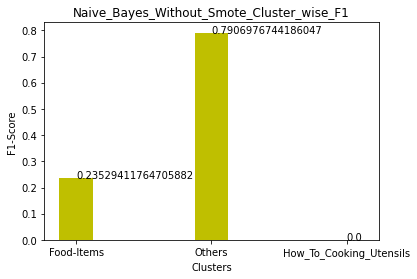

In [ ]:
Lst=[]
Clusters=['Food-Items','Others','How_To_Cooking_Utensils']
for c in Clusters:
  Lst.append([c,reslt[c]['f1-score']])
NB_plot=pd.DataFrame(Lst)
NB_plot.columns=['Cluster','F1']
plt.bar(NB_plot['Cluster'],NB_plot['F1'], color = 'y', width = 0.25)
plt.title('Naive_Bayes_Without_Smote_Cluster_wise_F1')
plt.ylabel('F1-Score')
plt.xlabel('Clusters')
for i in range(len(NB_plot['F1'].to_list())):
  plt.annotate(str(NB_plot['F1'][i]), xy=(NB_plot['Cluster'][i],NB_plot['F1'][i]))
plt.show()

In [ ]:
AVG=pd.DataFrame(Overall)
AVG.columns=['Algo','Accuracy','F1']

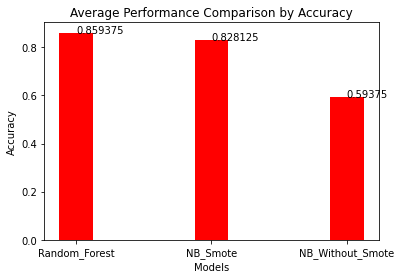

In [ ]:
plt.bar(AVG['Algo'],AVG['Accuracy'], color = 'r', width = 0.25)
plt.title('Average Performance Comparison by Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
for i in range(len(AVG['Accuracy'].to_list())):
  plt.annotate(str(AVG['Accuracy'][i]), xy=(AVG['Algo'][i],AVG['Accuracy'][i]))
plt.show()

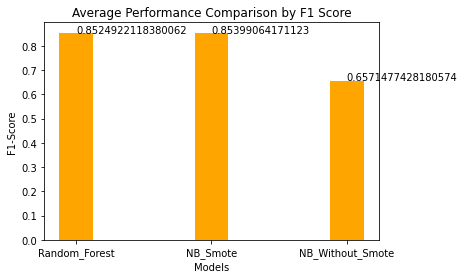

In [ ]:
plt.bar(AVG['Algo'],AVG['F1'], color = 'orange', width = 0.25)
plt.title('Average Performance Comparison by F1 Score')
plt.ylabel('F1-Score')
plt.xlabel('Models')
for i in range(len(AVG['F1'].to_list())):
  plt.annotate(str(AVG['F1'][i]), xy=(AVG['Algo'][i],AVG['F1'][i]))
plt.show()

***COMMENT CLASSIFICATION***

In [ ]:
oneclass=pf.Comments.loc[pf.Class==1].to_list()
twoclass=pf.Comments.loc[pf.Class==2].to_list()
threeclass=pf.Comments.loc[pf.Class==3].to_list()
Others=[]
how_to_cooking_utensils=[]
Food_items=[]
Full_doc=[]
for cmt in document:
  cntwords=textblob_tokenizer(cmt)
  L1=len(list(set(cntwords) & set(oneclass)))
  L2=len(list(set(cntwords) & set(twoclass)))
  L3=len(list(set(cntwords) & set(threeclass)))
  L=max(L1,L2,L3)
  if L==L1 and L>0:
    Food_items.append(cmt)
    Full_doc.append([cmt,1])
  elif L==L2 and L>0:
    Others.append(cmt)
    Full_doc.append([cmt,2])
  elif L==L3 and L>0:
    how_to_cooking_utensils.append(cmt)
    Full_doc.append([cmt,3])

***FILTER OUT COMMENTS USING DBSCAN TO SEE SUB CLUSTERS***

In [ ]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
# Load data in X 
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=textblob_tokenizer)
XOthers = vectorizer.fit_transform(Others)
db = DBSCAN(eps=0.3, min_samples=10).fit(XOthers) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels))
print(n_clusters_)
other=pd.DataFrame({'Comment':Others,'Class':labels})
other.loc[other.Class==-1]

1


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'el', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'le', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'u', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  

,Comment,Class
0,Fuck Muhammad,-1
1,fucking cholesterol,-1
2,I guess the Paleo is bad for the hairline,-1
3,that looks so goood,-1
4,that forehead is delicious for an omelette,-1
5,İlk defa düzgün yapılan bir menemen gördüm teb...,-1
6,I saw those eyes. That was a foodgasm.,-1
7,gross,-1
8,Quién eres tu?,-1
9,Re madarchodddd...bolney ki bimari hai kyaa re...,-1


In [ ]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
# Load data in X 
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=textblob_tokenizer)
Xhtc = vectorizer.fit_transform(how_to_cooking_utensils)
db = DBSCAN(eps=0.3, min_samples=10).fit(Xhtc) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels))
print(n_clusters_)
htc=pd.DataFrame({'Comment':how_to_cooking_utensils,'Class':labels})
htc.loc[htc.Class==1]

3


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'el', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'le', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'u', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  

,Comment,Class
18,Looks delicious,1
20,Looks so delicious 💛👍🏻🇬🇧🙏🏼,1
40,Looks delicious,1
41,Looks delicious,1
71,That looks delicious 😋,1
73,That looks delicious!!!!,1
77,Looks delicious,1
104,Looks delicious!,1
130,Looks delicious,1
165,Looks Delicious. .....,1


In [ ]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
# Load data in X 
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=textblob_tokenizer)
Xfiur = vectorizer.fit_transform(Food_items)
db = DBSCAN(eps=0.3, min_samples=10).fit(Xfiur) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) 
print(n_clusters_)
fiur=pd.DataFrame({'Comment':Food_items,'Class':labels})
fiur.loc[fiur.Class==0]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'el', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'le', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'u', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  

2


,Comment,Class
213,Loved it,0
318,"Lovely, well done.",0
514,We love it.Thank you 😍🤗🌷😘,0
858,love it :),0
1243,Love 😍,0
1254,Love it😘,0
1568,Love it!,0
2374,I love it!! I will do it!!,0
2600,made it. loved it!!,0
2644,love it....,0


In [ ]:
fd=pd.DataFrame(Full_doc)
fd.columns=["Comments","Class"]
